In [123]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt

In [124]:
df = pd.read_csv(r"C:\Users\gg787\Downloads\USArrests.csv")
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [125]:
df = df.rename(columns = {"Unnamed: 0":"City"})
df.head()

,City,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [126]:
label_list = df["City"].tolist()
label_list[:5]

['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California']

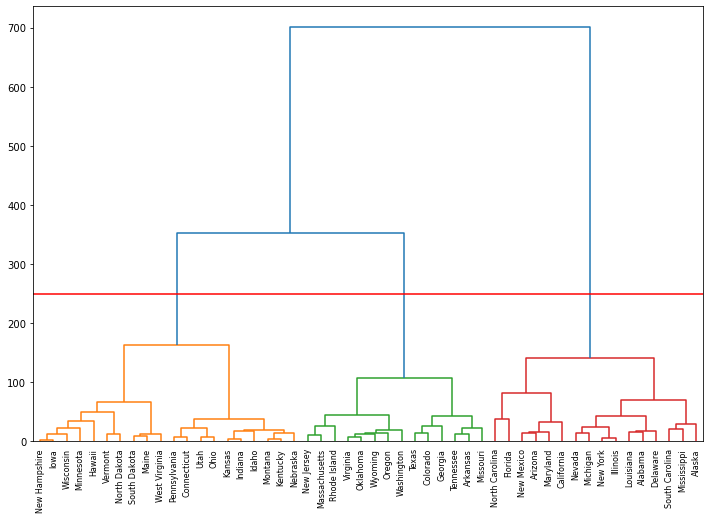

In [127]:
single = linkage(df.iloc[:,1:], method = "ward", metric = "euclidean")
plt.figure(figsize = (12,8))
dendrogram(single, color_threshold = 250, labels = label_list,distance_sort= "descending", show_leaf_counts= True)
plt.axhline(250, color = "r")
plt.show()

In [128]:
assignments = fcluster(single, 250, "distance")
print(assignments)

[1 1 1 2 1 2 3 1 1 2 3 3 1 3 3 3 3 1 3 1 2 1 3 1 2 3 3 1 3 2 1 1 1 3 3 2 2
 3 2 1 3 2 2 3 3 2 2 3 3 2]


In [129]:
df["target"] = assignments

In [130]:
df

,City,Murder,Assault,UrbanPop,Rape,target
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,2
6,Connecticut,3.3,110,77,11.1,3
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,2


In [131]:
df.groupby("target").mean()

,Murder,Assault,UrbanPop,Rape
target,,,,
1,11.812500,272.562500,68.312500,28.375000
2,8.214286,173.285714,70.642857,22.842857
3,4.270000,87.550000,59.750000,14.390000


In [132]:
# 비계층적 군집분석
df = pd.read_csv(r"C:\Users\gg787\Downloads\USArrests.csv")
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [133]:
df.drop("Unnamed: 0",axis = 1, inplace = True)

In [134]:
df.head(3)

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0


In [135]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3)
kmeans.fit(df)
labels = kmeans.predict(df)
# pred = kmeans.labels_
# pred

In [136]:
df["kmeans"] = labels
df.head()

,Murder,Assault,UrbanPop,Rape,kmeans
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,0
2,8.1,294,80,31.0,0
3,8.8,190,50,19.5,2
4,9.0,276,91,40.6,0


In [137]:
df.groupby("kmeans").mean()

,Murder,Assault,UrbanPop,Rape
kmeans,,,,
0,11.812500,272.562500,68.312500,28.375000
1,4.270000,87.550000,59.750000,14.390000
2,8.214286,173.285714,70.642857,22.842857


<AxesSubplot:xlabel='Murder', ylabel='kmeans'>

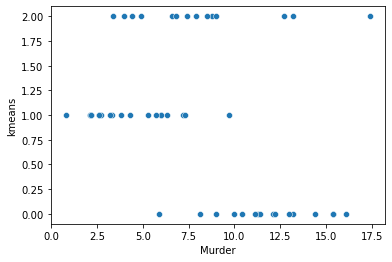

In [138]:
import seaborn as sns

sns.scatterplot(x = "Murder", y = "kmeans", data = df)

           Murder     Assault   UrbanPop       Rape
kmeans                                             
0       11.812500  272.562500  68.312500  28.375000
1        4.270000   87.550000  59.750000  14.390000
2        8.214286  173.285714  70.642857  22.842857


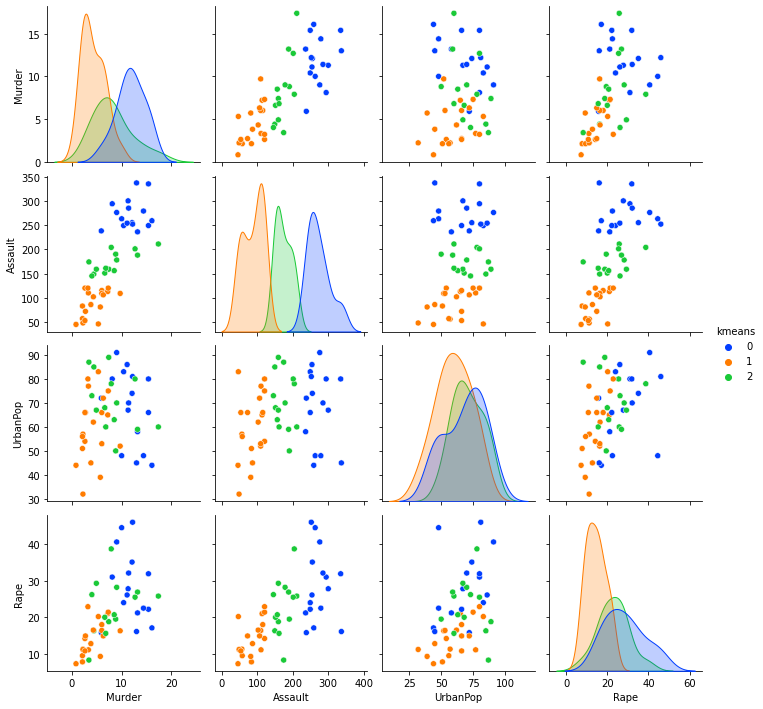

In [139]:
print(df.groupby("kmeans").mean())
sns.pairplot(df, diag_kind = "kde", hue = "kmeans", palette = "bright")

In [140]:
from sklearn.metrics import calinski_harabasz_score
calinski_harabasz_score(df, labels)

150.84202036318064

In [141]:

n = 2
for i in range(3,13):
    n += 1
    kmeans = KMeans(i)
    kmeans.fit(df)
    labels = kmeans.predict(df)
    print(calinski_harabasz_score(df, labels))
    print("----------------------------- {}".format(n))
    

150.84202036318064
----------------------------- 3
141.77562275079518
----------------------------- 4
152.7001468758641
----------------------------- 5
158.04633497704128
----------------------------- 6
156.23459746944775
----------------------------- 7
154.17469203804973
----------------------------- 8
158.41063095129064
----------------------------- 9
149.90744657016432
----------------------------- 10
145.17159086661593
----------------------------- 11
144.42723461218023
----------------------------- 12


In [142]:
# 엘보우 함수로 k 값 찾기

def elbow(X):
    sse = []
    for i in range(1,11):
        km = KMeans(n_clusters = i, random_state = 1)
        km.fit(X)
        sse.append(km.inertia_)
    

    plt.plot(range(1,11), sse, marker = "o")
    print(sse)

[355837.74159999995, 96420.47313628899, 47964.26535714285, 34728.629357142854, 24417.023523809527, 18768.000666666667, 15570.937333333333, 13329.361976190476, 11125.03380952381, 10121.13780952381]


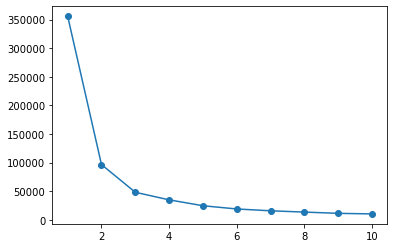

In [143]:
elbow(df)

In [144]:
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)

In [145]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps = 0.5, min_samples= 5)
db.fit(df)
labels = db.labels_
labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1, -1, -1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

In [146]:
df["dbscan"] = labels
df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),dbscan
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


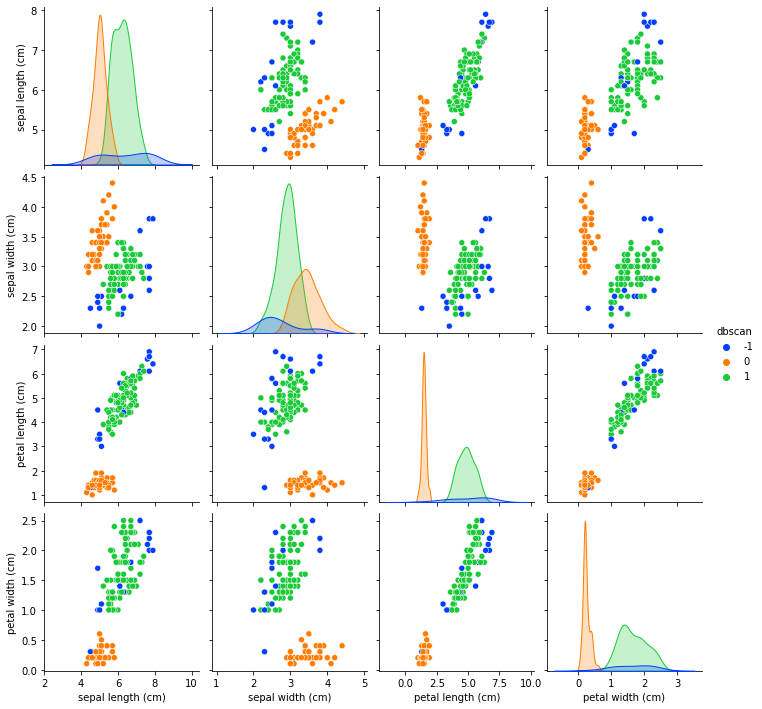

In [147]:
sns.pairplot(df, hue = "dbscan", palette = "bright")

In [148]:
import pandas as pd
import numpy as np

In [149]:
titanic = pd.read_csv(r"C:\Users\gg787\PerfectGuid수정ver01\1장\titanic\titanic_train.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [150]:
titanic.groupby("Pclass")["Sex"].value_counts()

Pclass  Sex   
1       male      122
        female     94
2       male      108
        female     76
3       male      347
        female    144
Name: Sex, dtype: int64

In [151]:
titanic.groupby("Pclass")["Age"].agg([max,min])

,max,min
Pclass,,
1,80.0,0.92
2,70.0,0.67
3,74.0,0.42


In [152]:
agg_format = {"Age":"max","Fare":"mean"}
titanic.groupby("Pclass").agg(agg_format)

,Age,Fare
Pclass,,
1,80.0,84.154687
2,70.0,20.662183
3,74.0,13.675550


In [153]:
titanic.groupby(["Pclass","Survived"])["Survived"].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [154]:
titanic.groupby(["Pclass","Sex"])["Survived"].count()

Pclass  Sex   
1       female     94
        male      122
2       female     76
        male      108
3       female    144
        male      347
Name: Survived, dtype: int64

In [155]:
titanic.groupby(["Pclass"])["Sex"].value_counts()

Pclass  Sex   
1       male      122
        female     94
2       male      108
        female     76
3       male      347
        female    144
Name: Sex, dtype: int64

In [156]:
titanic.groupby("Pclass").agg(agg_max = ("Age", "max"),agg_min = ("Age","min"), Fare_mean = ("Fare","mean"))

,agg_max,agg_min,Fare_mean
Pclass,,,
1,80.0,0.92,84.154687
2,70.0,0.67,20.662183
3,74.0,0.42,13.675550


In [157]:
# 혼합 분포 군집모형

from sklearn.datasets import load_iris

iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [158]:
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture

scaler = StandardScaler()
scaler = scaler.fit(iris_df)
scaler_df = scaler.transform(iris_df)

In [159]:
scaler_df

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [160]:
gnn = GaussianMixture(n_components = 3)
gnn.fit(scaler_df)
gnn_labels = gnn.predict(scaler_df)

In [161]:
gnn_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [162]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [163]:
iris_df["gmm_labels"] = gnn_labels

In [164]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),gmm_labels
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


In [165]:
iris_df.groupby("gmm_labels").mean()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
gmm_labels,,,,
0,6.554545,2.950909,5.489091,1.989091
1,5.006000,3.428000,1.462000,0.246000
2,5.904444,2.775556,4.193333,1.293333


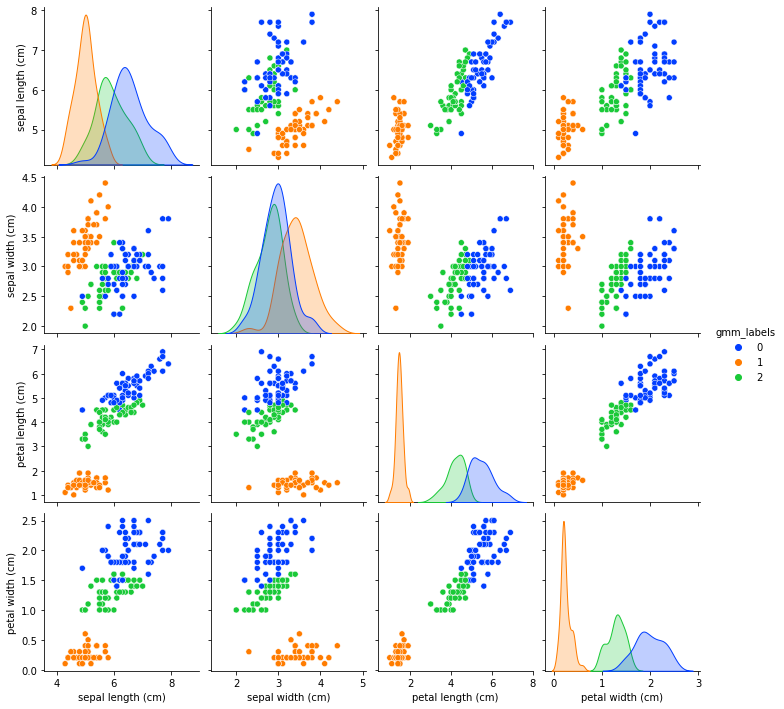

In [166]:
sns.pairplot(iris_df, hue = "gmm_labels", palette="bright")

<AxesSubplot:xlabel='sepal length (cm)', ylabel='Density'>

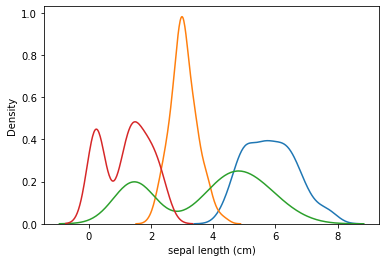

In [167]:
sns.kdeplot(iris_df["sepal length (cm)"])
sns.kdeplot(iris_df["sepal width (cm)"])
sns.kdeplot(iris_df["petal length (cm)"])
sns.kdeplot(iris_df["petal width (cm)"])

In [168]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler = scaler.fit(iris_df)
scaler_df = scaler.transform(iris_df)
scaler_df

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00,  8.19231921e-02],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00,  8.19231921e-02],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00,  8.19231921e-02],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00,  8.19231921e-02],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00,  8.19231921e-02],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00,  8.19231921e-02],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00,  8.19231921e-02],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00,  8.19231921e-02],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00,  8.19231921e-02],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00

In [171]:
from sklearn_som.som import SOM

iris_som = SOM(n = 3, m = 1, dim = 4)
iris_som.fit(scaler_df)

ValueError: operands could not be broadcast together with shapes (3,5) (3,4) 

In [ ]:
som_labels = iris_som.predict(scaler_df)
som_labels

In [ ]:
som_df = pd.DataFrame(data = scaler_df, columns = ["sepal length (cm)","sepal width (cm)","petal length (cm)","petal width (cm)"])
som_df["som_labels"] = som_labels

In [ ]:
som_df

In [ ]:
sns.pairplot(som_df, hue = "som_labels",palette = "bright")

In [ ]:
# 17회 기출풀이

# 데이터를 7:3으로 나누고 som 알고리즘으로 군집화후 test 데이터에 대한 오분류표를 구하라.

In [184]:
from sklearn.datasets import load_iris

iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df["target"] = iris.target

In [185]:
feature = iris_df.drop("target", axis = 1)
label = iris_df["target"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(feature,label, stratify= label, random_state = 2021)

In [186]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


<AxesSubplot:xlabel='sepal length (cm)', ylabel='Density'>

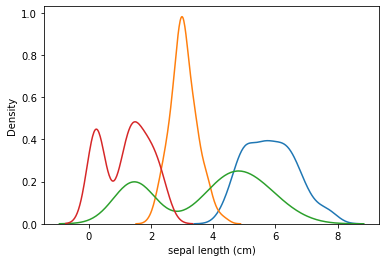

In [187]:
sns.kdeplot(iris_df["sepal length (cm)"])
sns.kdeplot(iris_df["sepal width (cm)"])
sns.kdeplot(iris_df["petal length (cm)"])
sns.kdeplot(iris_df["petal width (cm)"])

In [188]:
from sklearn_som.som import SOM

som_model = SOM(n = 3, m = 1, dim = 4)
som_model.fit(X_train.values)
som_label = som_model.predict(X_test.values)

In [189]:
train_som_df = pd.DataFrame(data = X_test.values, columns = iris.feature_names)
train_som_df["som_label"] = som_label

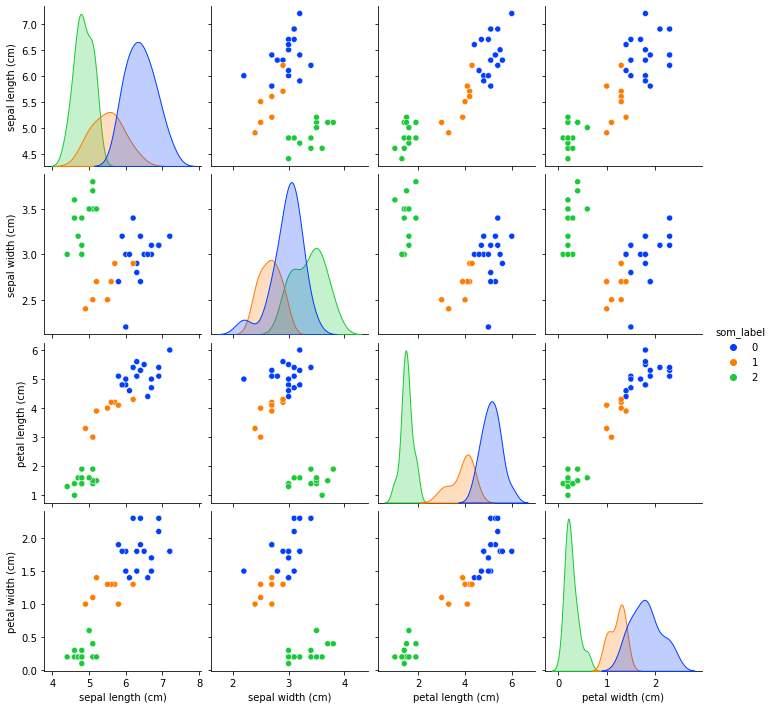

In [190]:
sns.pairplot(train_som_df, hue = "som_label", palette = "bright")

In [191]:
train_som_df["real_target"] = y_test.values

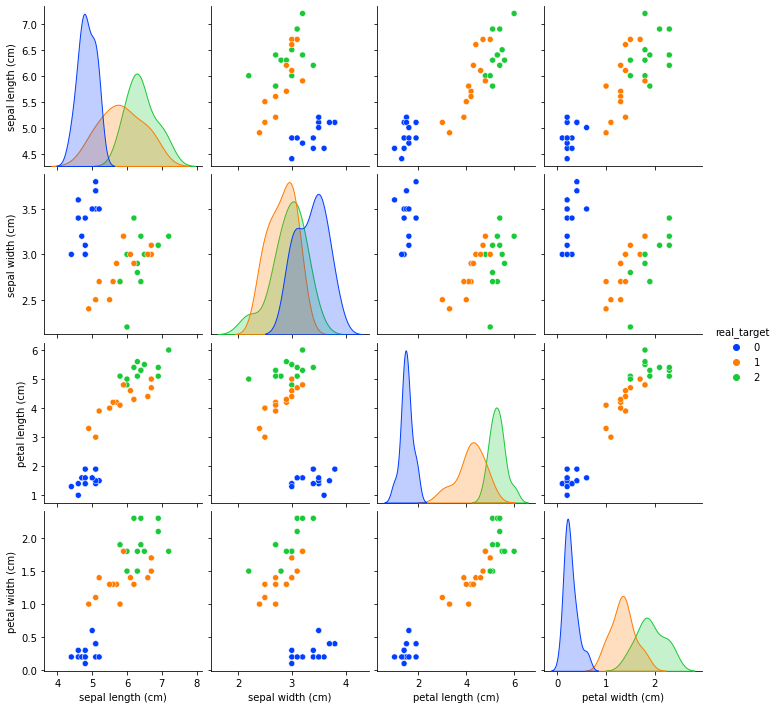

In [192]:
sns.pairplot(train_som_df.drop("som_label", axis = 1), hue = "real_target",palette = "bright")

In [199]:
train_som_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),som_label,real_target
0,4.8,3.0,1.4,0.3,0,0
1,4.6,3.6,1.0,0.2,0,0
2,4.8,3.0,1.4,0.1,0,0
3,4.7,3.2,1.6,0.2,0,0
4,4.9,2.4,3.3,1.0,1,1


In [195]:
train_som_df["som_label"] = train_som_df["som_label"].replace([2,0],[0,2])

In [202]:
real_label = train_som_df["real_target"]
pred_label = train_som_df["som_label"]

In [219]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, f1_score, confusion_matrix, plot_roc_curve

print("정확도", accuracy_score(real_label, pred_label))
confusion_matrix(real_label, pred_label)

정확도 0.868421052631579


array([[13,  0,  0],
       [ 0,  8,  5],
       [ 0,  0, 12]], dtype=int64)

In [223]:
import pandas as pd

data = ['a','a','b','b','a','a','a','a','b','b','b','b','b','a','a','b','b','a','b','b']

In [240]:
data_df = pd.DataFrame(data)

data_df.loc[data_df[0] == "a",0] = 1
data_df.loc[data_df[0] == "b",0] = 0

In [245]:
from statsmodels.sandbox.stats.runs import runstest_1samp, Runs

runstest_1samp(data_df[0])

(-1.1144881152070183, 0.26506984027306035)

In [259]:
!conda config --add channels conda-forge
!conda install mixtend==0.17.0

^C


In [313]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

dataset = [['Apple', 'Beer', 'Rice', 'Chicken'],
           ['Apple', 'Beer', 'Rice'],
           ['Apple', 'Beer'],
           ['Apple', 'Bananas'],
           ['Milk', 'Beer', 'Rice', 'Chicken'],
           ['Milk', 'Beer', 'Rice'],
           ['Milk', 'Beer'],
           ['Apple', 'Bananas']]


te = TransactionEncoder()
te_ary = te.fit(dataset)
te_ary = te.transform(dataset)

In [314]:
print(te.columns_)
te_ary

te_df = pd.DataFrame(te_ary, columns = te.columns_)
te_df

['Apple', 'Bananas', 'Beer', 'Chicken', 'Milk', 'Rice']


,Apple,Bananas,Beer,Chicken,Milk,Rice
0,True,False,True,True,False,True
1,True,False,True,False,False,True
2,True,False,True,False,False,False
3,True,True,False,False,False,False
4,False,False,True,True,True,True
5,False,False,True,False,True,True
6,False,False,True,False,True,False
7,True,True,False,False,False,False


In [315]:
from mlxtend.frequent_patterns import apriori

apriori(te_df, min_support = 0.6)

,support,itemsets
0,0.625,(0)
1,0.750,(2)


In [316]:
apriori_df = apriori(te_df, min_support = 0.6, use_colnames = True)

In [317]:
apriori_df["apriori_len"] = apriori_df["itemsets"].apply(lambda x : len(x))

In [318]:
apriori_df

,support,itemsets,apriori_len
0,0.625,(Apple),1
1,0.750,(Beer),1


In [319]:
gro = pd.read_csv(r"C:\Users\gg787\Downloads\groceries.csv")
gro.head()

,"citrus fruit,semi-finished bread,margarine,ready soups"
0,"tropical fruit,yogurt,coffee"
1,whole milk
2,"pip fruit,yogurt,cream cheese,meat spreads"
3,"other vegetables,whole milk,condensed milk,lon..."
4,"whole milk,butter,yogurt,rice,abrasive cleaner"


In [320]:
gro.loc[9834, "citrus fruit,semi-finished bread,margarine,ready soups"] = "citrus fruit,semi-finished bread,margarine,ready soups"

In [322]:
gro_split = gro.iloc[:,0].str.split(",", expand = True)

In [323]:
gro_split.values

array([['tropical fruit', 'yogurt', 'coffee', ..., None, None, None],
       ['whole milk', None, None, ..., None, None, None],
       ['pip fruit', 'yogurt', 'cream cheese', ..., None, None, None],
       ...,
       ['semi-finished bread', 'bottled water', 'soda', ..., None, None,
        None],
       ['chicken', 'tropical fruit', 'other vegetables', ..., None, None,
        None],
       ['citrus fruit', 'semi-finished bread', 'margarine', ..., None,
        None, None]], dtype=object)

In [324]:
gro_split

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,tropical fruit,yogurt,coffee,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,whole milk,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,pip fruit,yogurt,cream cheese,meat spreads,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,other vegetables,whole milk,condensed milk,long life bakery product,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,whole milk,butter,yogurt,rice,abrasive cleaner,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,cooking chocolate,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
9831,chicken,citrus fruit,other vegetables,butter,yogurt,frozen dessert,domestic eggs,rolls/buns,rum,cling film/bags,...,None,None,None,None,None,None,None,None,None,None
9832,semi-finished bread,bottled water,soda,bottled beer,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
9833,chicken,tropical fruit,other vegetables,vinegar,shopping bags,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [334]:
not_null_df = []

for i in range(len(gro_split.values)):
    temp = list(filter(None,gro_split.values[i]))
    not_null_df.append(temp)

In [337]:
not_null_df

[['tropical fruit', 'yogurt', 'coffee'],
 ['whole milk'],
 ['pip fruit', 'yogurt', 'cream cheese', 'meat spreads'],
 ['other vegetables',
  'whole milk',
  'condensed milk',
  'long life bakery product'],
 ['whole milk', 'butter', 'yogurt', 'rice', 'abrasive cleaner'],
 ['rolls/buns'],
 ['other vegetables',
  'UHT-milk',
  'rolls/buns',
  'bottled beer',
  'liquor (appetizer)'],
 ['potted plants'],
 ['whole milk', 'cereals'],
 ['tropical fruit',
  'other vegetables',
  'white bread',
  'bottled water',
  'chocolate'],
 ['citrus fruit',
  'tropical fruit',
  'whole milk',
  'butter',
  'curd',
  'yogurt',
  'flour',
  'bottled water',
  'dishes'],
 ['beef'],
 ['frankfurter', 'rolls/buns', 'soda'],
 ['chicken', 'tropical fruit'],
 ['butter', 'sugar', 'fruit/vegetable juice', 'newspapers'],
 ['fruit/vegetable juice'],
 ['packaged fruit/vegetables'],
 ['chocolate'],
 ['specialty bar'],
 ['other vegetables'],
 ['butter milk', 'pastry'],
 ['whole milk'],
 ['tropical fruit',
  'cream cheese',

In [338]:
from mlxtend.preprocessing import TransactionEncoder
import pandas as pd

te = TransactionEncoder()
te.fit(not_null_df)
te_df = te.transform(not_null_df)

In [339]:
te_df

array([[False, False, False, ..., False,  True, False],
       [False, False, False, ...,  True, False, False],
       [False, False, False, ..., False,  True, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [341]:
te_df = pd.DataFrame(te_df, columns = te.columns_)

In [342]:
from mlxtend.frequent_patterns import apriori

groceries_ap = apriori(te_df, min_support = 0.05, use_colnames = True)
groceries_ap

,support,itemsets
0,0.052466,(beef)
1,0.080529,(bottled beer)
2,0.110524,(bottled water)
3,0.064870,(brown bread)
4,0.055414,(butter)
5,0.077682,(canned beer)
6,0.082766,(citrus fruit)
7,0.058058,(coffee)
8,0.053279,(curd)
9,0.063447,(domestic eggs)


In [346]:
from mlxtend.frequent_patterns import association_rules

association_rules(groceries_ap, metric = "confidence",min_threshold= 0.3)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(other vegetables),(whole milk),0.193493,0.255516,0.074835,0.386758,1.513634,0.025394,1.214013
1,(rolls/buns),(whole milk),0.183935,0.255516,0.056634,0.307905,1.205032,0.009636,1.075696
2,(yogurt),(whole milk),0.139502,0.255516,0.056024,0.401603,1.571735,0.020379,1.244132


In [3]:
 # 시계열 분해
    
import pandas as pd

data = pd.read_csv(r"C:\Users\gg787\Downloads\arima_data.csv", header = None, names = ["day","price"])

In [4]:
data = data.set_index("day")

In [5]:
data.index = pd.to_datetime(data.index, format = "%Y-%m-%d")

<AxesSubplot:xlabel='day'>

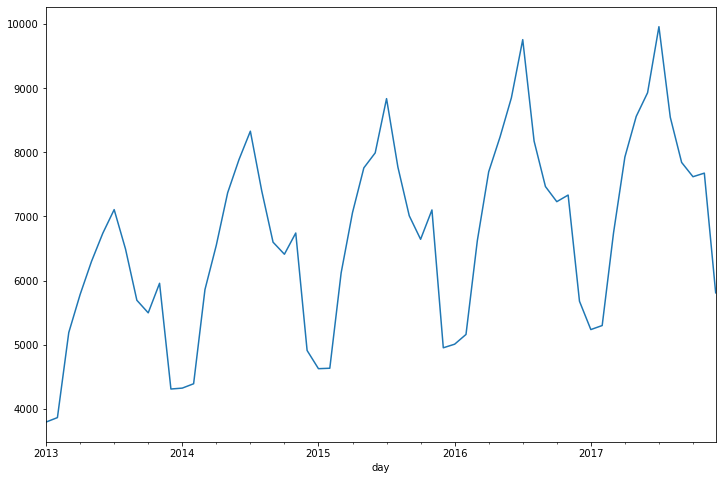

In [48]:
data["price"].plot()

<Figure size 1440x720 with 0 Axes>

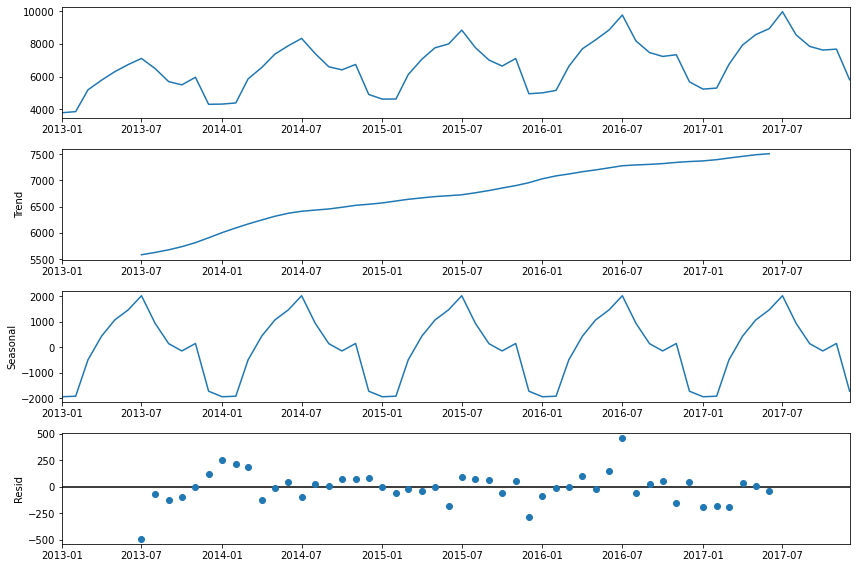

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

plt.figure(figsize = (20,10))
ts = data
result = seasonal_decompose(ts)

plt.rcParams["figure.figsize"] = [12,8]
result.plot()
plt.show()

In [10]:
# 정상성 검정
train_len = int(ts.shape[0]*0.8)

train_set = ts[:train_len]
test_set = ts.drop(train_set.index, axis = 0)

In [51]:
from statsmodels.tsa.stattools import adfuller

adf = adfuller(train_set, regression="ct")

print("adf 통계량", adf[0])
print("adf p-value", adf[1])

adf 통계량 -1.5534576841968433
adf p-value 0.8101271267082275


In [52]:
# 차분 

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

diff_data = train_set.diff(1).dropna()
diff_data.head()

,price
day,
2013-02-01,69.0
2013-03-01,1327.0
2013-04-01,593.0
2013-05-01,515.0
2013-06-01,441.0


In [53]:
from statsmodels.tsa.stattools import adfuller

adf = adfuller(diff_data.dropna())

print("F 통계량", adf[0])
print("P-value", adf[1])

F 통계량 -9.608160193484567
P-value 1.8421617996396514e-16


C:\Users\gg787\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


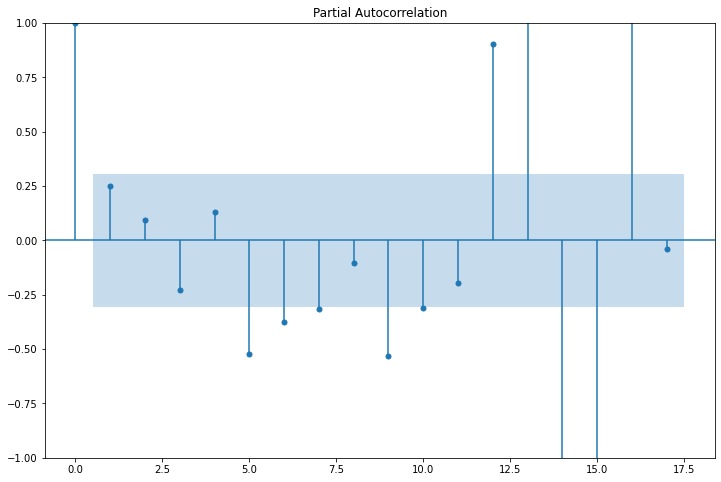

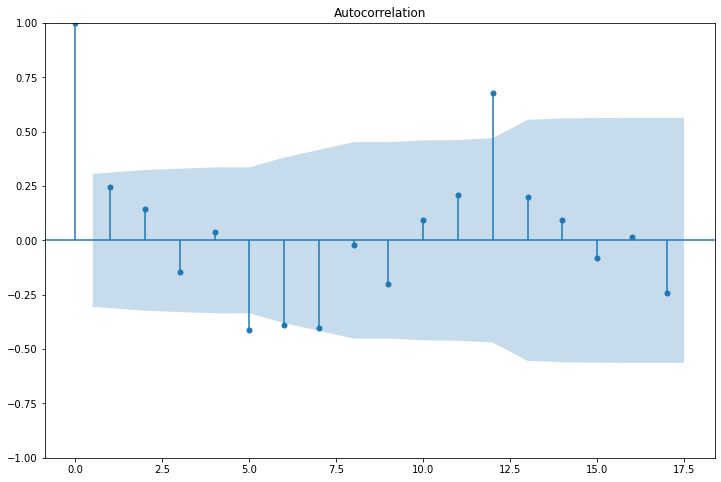

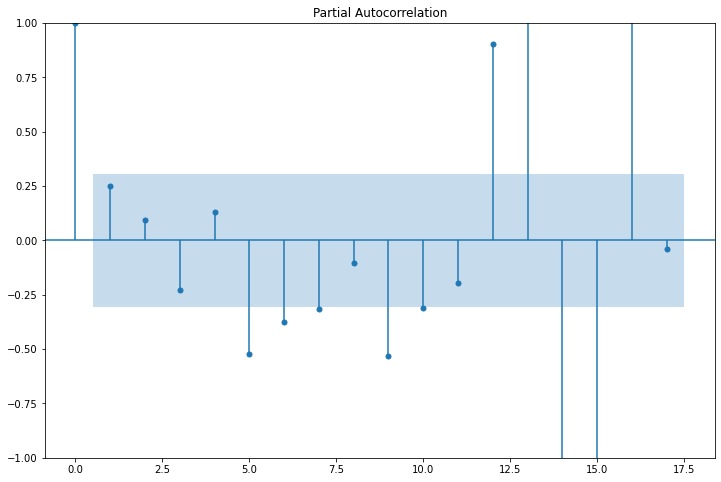

In [54]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(diff_data)
plot_pacf(diff_data)

In [55]:
# arima 모델 생성

from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm

model = ARIMA(train_set["price"].values, order = (2,1,2))
res = model.fit()
res.summary()

C:\Users\gg787\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\gg787\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\gg787\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   42
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -328.547
Date:                Thu, 19 May 2022   AIC                            667.094
Time:                        16:26:23   BIC                            675.661
Sample:                             0   HQIC                           670.214
                                 - 42                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3439      0.229     -5.874      0.000      -1.792      -0.896
ar.L2         -0.3467      0.230     -1.510      0.131      -0.797       0.103
ma.L1          1.9619      0.257      7.647      0.000       1.459       2.465
ma.L2          0.9887      0.258      3.833      0.000       0.483       1.494
sigma2      4.561e+05   1.25e-06   3.66e+11      0.000    4.56e+05    4.56e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):                 1.36
Prob(Q):                              0.73   Prob(JB):                         0.51
Heteroskedasticity (H):               1.36   Skew:                            -0.43
Prob(H) (two-sided):                  0.58   Kurtosis:                         3.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 9.26e+26. Standard errors may be unstable.
"""

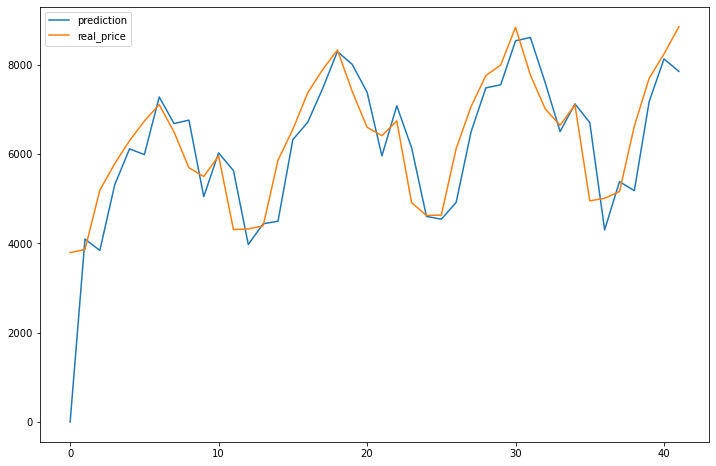

In [56]:
plt.plot(res.predict(), label = "prediction")
plt.plot(train_set["price"].values, label = "real_price")
plt.legend()
plt.show()

In [59]:
forecast_data = res.forecast(steps = len(test_set), alpha = 0.1)

pred_y = forecast_data.tolist()
pred_y

[9879.009838859958,
 9243.00558607854,
 9741.34273938366,
 9292.117481211808,
 9723.067147196121,
 9299.652125393013,
 9719.277058415595,
 9302.133534558241,
 9717.256236441632,
 9303.989061200706,
 9715.46317564619,
 9305.755478107507,
 9713.710910007454,
 9307.49796269937,
 9711.976664213493,
 9309.224527273042,
 9710.257566192378,
 9310.936253934617]

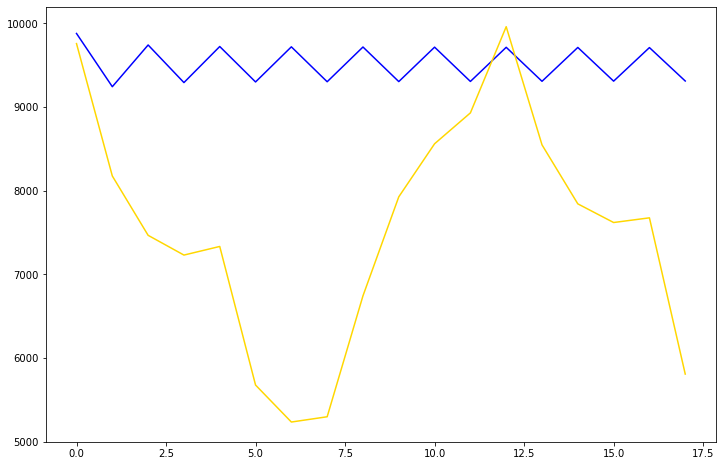

In [67]:
plt.plot(pred_y, color = "blue")
plt.plot(test_set.values, color = "gold")
plt.show()

In [69]:
from sklearn.metrics import r2_score

r2_score(pred_y, test_set.values)

-111.74465364557373

In [2]:
# SARIMA 

data = pd.read_csv(r"C:\Users\gg787\Downloads\arima_data.csv", header = None, names = ["day","price"])
data.head()

NameError: name 'pd' is not defined

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   day     60 non-null     object
 1   price   60 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [76]:
data["day"] = pd.to_datetime(data["day"], format = "%Y-%m-%d")
data.head()

,day,price
0,2013-01-01,3794
1,2013-02-01,3863
2,2013-03-01,5190
3,2013-04-01,5783
4,2013-05-01,6298


In [ ]:
data = data.set_index("day")

In [81]:
data.head()

,price
day,
2013-01-01,3794
2013-02-01,3863
2013-03-01,5190
2013-04-01,5783
2013-05-01,6298


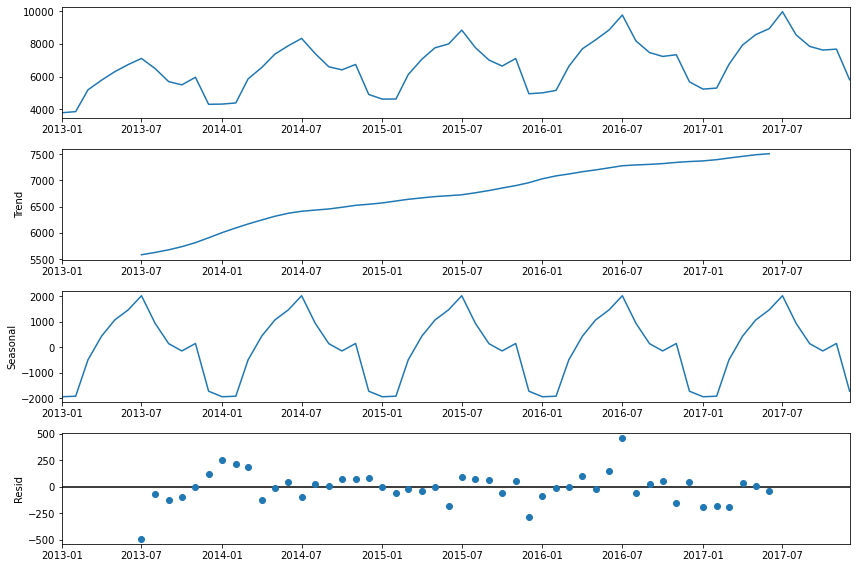

In [87]:
from statsmodels.tsa.seasonal import seasonal_decompose

seasonal_decompose(data).plot();

In [94]:
train_len = int(data.shape[0] * 0.7)

train_set = data[:train_len]
test_set = data.drop(train_set.index, axis = 0)

In [102]:
from statsmodels.tsa.stattools import adfuller

adf = adfuller(train_set, regression= "ct")

print("F-통계량 {}".format(adf[0]))
print("P-value {}".format(adf[1]))

F-통계량 -1.5534576841968433
P-value 0.8101271267082275


<AxesSubplot:xlabel='day'>

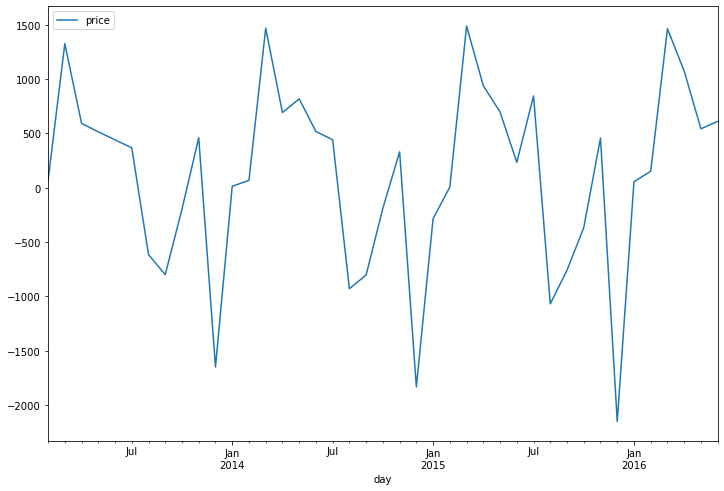

In [105]:
# 정상성을 만족하지 않아 차분 시행

diff_adf = train_set.diff(1).dropna()
diff_adf.plot()

In [104]:
# 정상성 확인

adf_1 = adfuller(diff_adf)

print("F-통계량 : {}".format(adf_1[0]))
print("P-value : {}".format(adf_1[1]))

F-통계량 : -9.608160193484567
P-value : 1.8421617996396514e-16


C:\Users\gg787\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


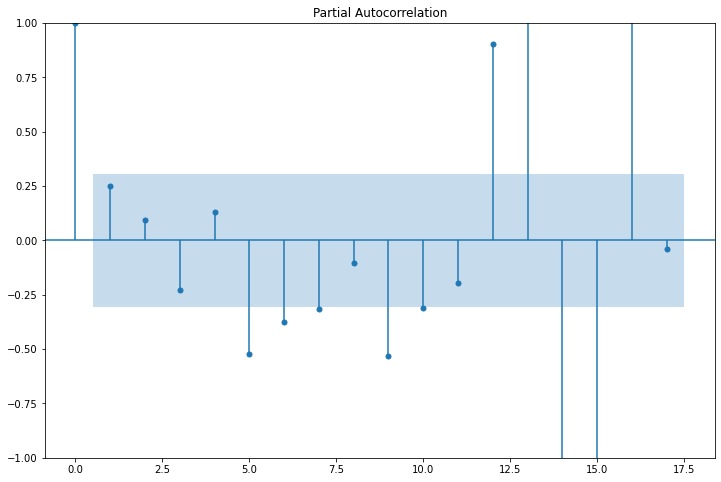

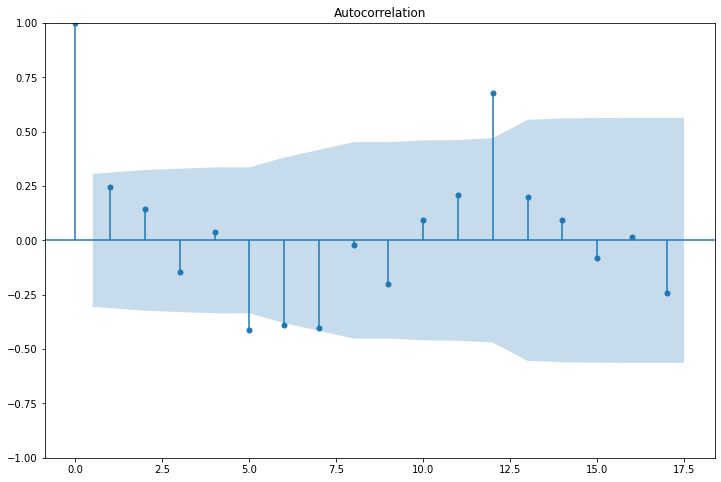

In [108]:
# 정상성 만족하므로 ARIMA 모형의 p 값과 q 값 찾기

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_pacf(diff_adf); # p값 확인가능 2
plot_acf(diff_adf); # q값 확인가능 2
plt.show()

In [110]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train_set["price"].values, order = (2,1,2))
result = model.fit()
result.summary()

C:\Users\gg787\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\gg787\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\gg787\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   42
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -328.547
Date:                Thu, 19 May 2022   AIC                            667.094
Time:                        17:19:29   BIC                            675.661
Sample:                             0   HQIC                           670.214
                                 - 42                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3439      0.229     -5.874      0.000      -1.792      -0.896
ar.L2         -0.3467      0.230     -1.510      0.131      -0.797       0.103
ma.L1          1.9619      0.257      7.647      0.000       1.459       2.465
ma.L2          0.9887      0.258      3.833      0.000       0.483       1.494
sigma2      4.561e+05   1.25e-06   3.66e+11      0.000    4.56e+05    4.56e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):                 1.36
Prob(Q):                              0.73   Prob(JB):                         0.51
Heteroskedasticity (H):               1.36   Skew:                            -0.43
Prob(H) (two-sided):                  0.58   Kurtosis:                         3.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 9.26e+26. Standard errors may be unstable.
"""

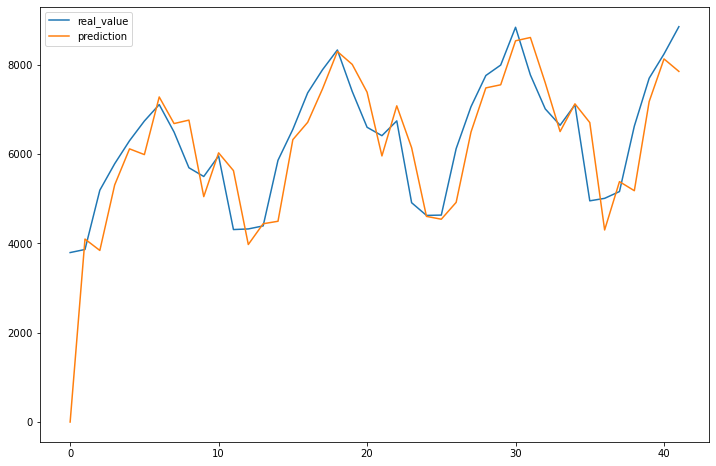

In [118]:
# train_set 을 예측모델이 얼마나 잘예측 하고있는지 시각화
plt.plot(train_set.values, label = "real_value")
plt.plot(res.predict(), label = "prediction")
plt.legend()

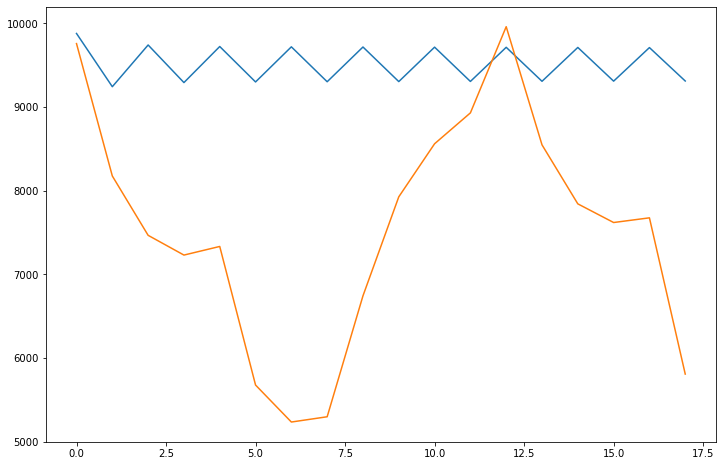

In [120]:
# test 값에 대한 예측 그래프를 시각화

forecast_data = result.forecast(steps = len(test_set))

plt.plot(forecast_data)
plt.plot(test_set.values)

In [121]:
# rmse 구하기
from sklearn.metrics import r2_score

r2_score(test_set.values, forecast_data)

-2.063475040083189

In [123]:
s_data = data.copy()

In [130]:
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train_set["price"].values,\
              order = (2,1,2), seasonal_order = (1,1,1,12),\
              trend = "ct",
              enforce_invertibility = False
               ,enforce_se)

result = model.fit()
result.summary()

C:\Users\gg787\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\gg787\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\gg787\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                   42
Model:             SARIMAX(2, 1, 2)x(1, 1, [1], 12)   Log Likelihood                -193.257
Date:                              Thu, 19 May 2022   AIC                            404.514
Time:                                      17:33:25   BIC                            416.820
Sample:                                           0   HQIC                           408.368
                                               - 42                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   -260.8953    851.259     -0.306      0.759   -1929.333    1407.542
drift          7.5441     24.529      0.308      0.758     -40.531      55.619
ar.L1         -0.4220      5.859     -0.072      0.943     -11.906      11.062
ar.L2          0.5756      3.610      0.159      0.873      -6.500       7.652
ma.L1          0.0018    111.838   1.61e-05      1.000    -219.197     219.200
ma.L2         -0.9981    112.713     -0.009      0.993    -221.911     219.915
ar.S.L12      -0.9897      1.704     -0.581      0.561      -4.329       2.349
ma.S.L12       0.9994     18.265      0.055      0.956     -34.799      36.798
sigma2      3.509e+04   3.52e+06      0.010      0.992   -6.85e+06    6.92e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                 0.40
Prob(Q):                              0.83   Prob(JB):                         0.82
Heteroskedasticity (H):               0.74   Skew:                            -0.11
Prob(H) (two-sided):                  0.65   Kurtosis:                         2.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 9.04e+14. Standard errors may be unstable.
"""

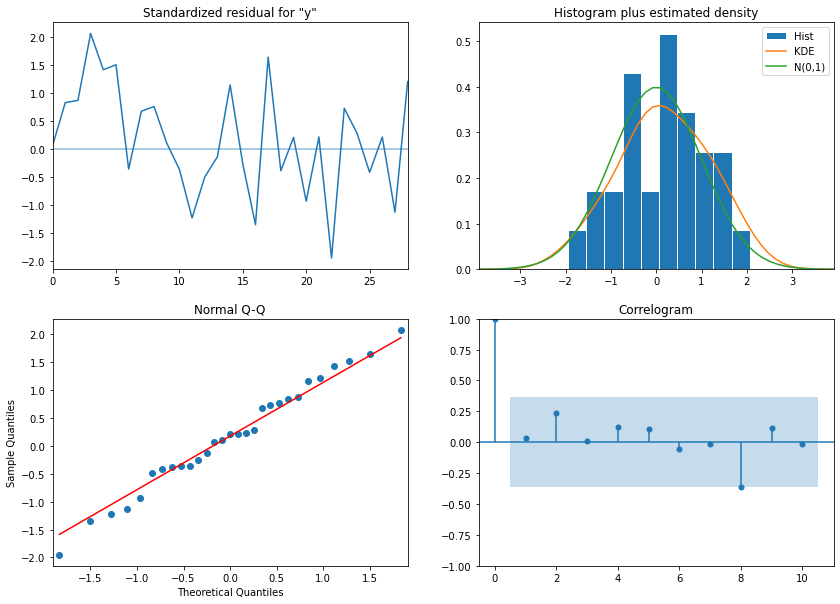

In [131]:
result.plot_diagnostics(figsize = (14,10))
plt.show()

In [135]:
forecast_values = result.get_forecast(steps = len(test_set))

forecast_values.summary_frame()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,9720.187634,190.490639,9346.832842,10093.542426
1,8693.741427,222.754754,8257.150132,9130.332723
2,7984.413508,233.981510,7525.818176,8443.008840
3,7673.586960,238.478184,7206.178308,8140.995611
4,8192.157154,240.422663,7720.937394,8663.376914
5,6103.668667,241.333870,5630.662974,6576.674360
6,6224.024999,241.751730,5750.200315,6697.849683
7,6442.303684,242.006751,5967.979168,6916.628201
8,7977.993072,242.144059,7503.399437,8452.586707
9,9128.406125,242.224282,8653.655255,9603.156995


In [136]:
forecast_values.conf_int()

array([[ 9346.83284161, 10093.54242649],
       [ 8257.15013215,  9130.33272269],
       [ 7525.81817623,  8443.00884035],
       [ 7206.17830832,  8140.99561082],
       [ 7720.93739393,  8663.3769142 ],
       [ 5630.66297392,  6576.67436045],
       [ 5750.20031497,  6697.84968276],
       [ 5967.97916778,  6916.62820095],
       [ 7503.39943699,  8452.58670719],
       [ 8653.65525546,  9603.15699514],
       [ 9283.87711259, 10233.55272425],
       [ 9991.93094112, 10941.71878852],
       [10815.47419554, 12058.37116075],
       [ 9849.88269554, 11190.72643998],
       [ 9241.11987614, 10620.8267441 ],
       [ 9050.61571811, 10447.71754165],
       [ 9701.20806567, 11106.59884547],
       [ 7757.38776386,  9167.08995272]])

<AxesSubplot:xlabel='day'>

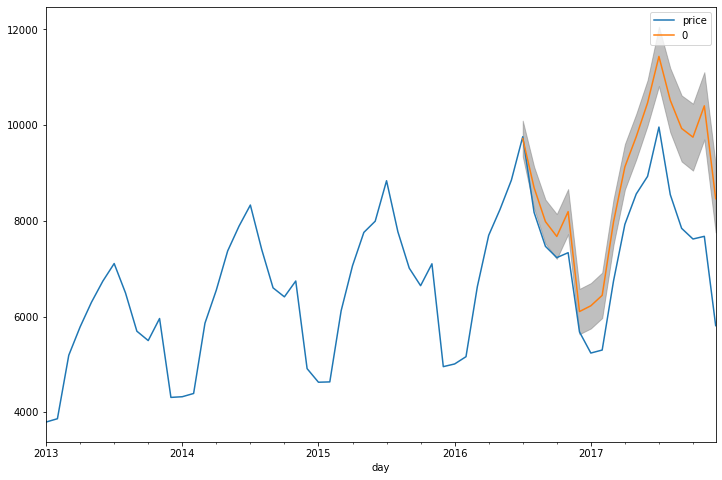

In [149]:
ax = s_data.plot()
pred_ci = pd.DataFrame(forecast_values.conf_int())
pred_ci.index = list(test_set.index)

ax.fill_between(pred_ci.index, pred_ci.iloc[:,0],pred_ci.iloc[:,1],color = "gray", alpha = 0.5)

predicted = pd.DataFrame(forecast_values.predicted_mean)
predicted.index = test_set.index

predicted.plot(ax = ax)

In [156]:
from sklearn.metrics import r2_score

r2_score(predicted, test_set.values)

0.041369399411362195

In [157]:
# auto-arima

import pandas as pd
import matplotlib.pyplot as plt

auto_data = data.copy()

In [17]:
from pmdarima import auto_arima

auto_model = auto_arima(train_set, start_P = 1,start_D = 1, start_Q = 1,\
                       max_P = 5, max_D = 5, max_Q = 5, m = 12,
                       seasonal = True, information_criterion= "aic"
                    ,stepwise = True, trace = True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=500.904, Time=1.38 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=513.245, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=496.519, Time=0.13 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=500.500, Time=0.40 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=569.050, Time=0.02 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=495.874, Time=0.10 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=496.035, Time=0.35 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=498.479, Time=0.14 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AIC=497.831, Time=0.15 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=497.839, Time=0.17 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=501.105, Time=0.07 sec
 ARIMA(2,0,1)(0,1,0)[12] intercept   : AIC=499.873, Time=0.14 sec
 ARIMA(1,0,0)(0,1,0)[12]             : AIC=510.570, Time=0.05 sec

Best model:  ARIMA(1,0,0)(0,1,0)[12] intercept
Total fit time: 3.139 seconds


In [18]:
auto_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   48
Model:             SARIMAX(1, 0, 0)x(0, 1, 0, 12)   Log Likelihood                -244.937
Date:                            Thu, 19 May 2022   AIC                            495.874
Time:                                    18:51:58   BIC                            500.625
Sample:                                         0   HQIC                           497.532
                                             - 48                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    239.6143     71.575      3.348      0.001      99.331     379.898
ar.L1          0.5607      0.093      6.009      0.000       0.378       0.744
sigma2      4.342e+04   1.27e+04      3.411      0.001    1.85e+04    6.84e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.14   Jarque-Bera (JB):                 1.08
Prob(Q):                              0.70   Prob(JB):                         0.58
Heteroskedasticity (H):               1.05   Skew:                            -0.09
Prob(H) (two-sided):                  0.93   Kurtosis:                         2.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [23]:
prediction = pd.DataFrame(auto_model.predict(n_periods = len(test_set)), index = test_set.index, columns = ["predicted_price"])

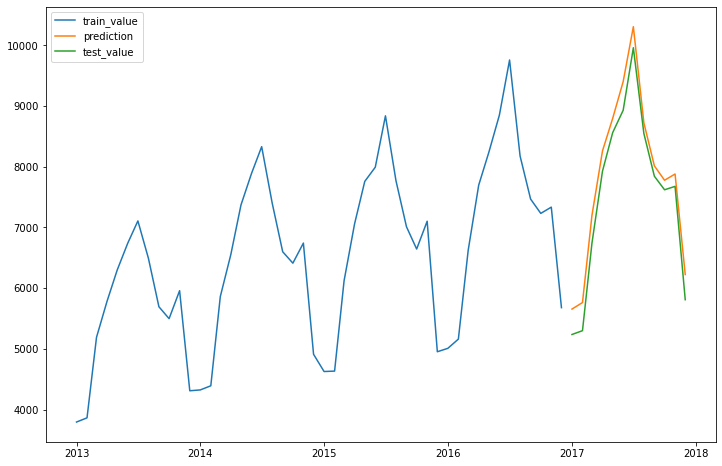

In [28]:
plt.plot(train_set, label = "train_value")
plt.plot(prediction,label = "prediction")
plt.plot(test_set, label = "test_value")
plt.legend()

In [33]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

np.sqrt(mean_squared_error(test_set, prediction))
print(r2_score(test_set, prediction))

0.9415945051140948


In [34]:
s_data = pd.read_csv(r"C:\Users\gg787\Downloads\sarima_data.csv")
s_data.head()

,date,sales
0,1964-01-01,2815
1,1964-02-01,2672
2,1964-03-01,2755
3,1964-04-01,2721
4,1964-05-01,2946


In [35]:
s_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    105 non-null    object
 1   sales   105 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 1.8+ KB


In [36]:
s_data["date"] = pd.to_datetime(s_data["date"], format = "%Y-%m-%d")

In [ ]:
s_data = s_data.set_index("date")

In [41]:
s_data

,sales
date,
1964-01-01,2815
1964-02-01,2672
1964-03-01,2755
1964-04-01,2721
1964-05-01,2946
...,...
1972-05-01,4618
1972-06-01,5312
1972-07-01,4298


<AxesSubplot:xlabel='date'>

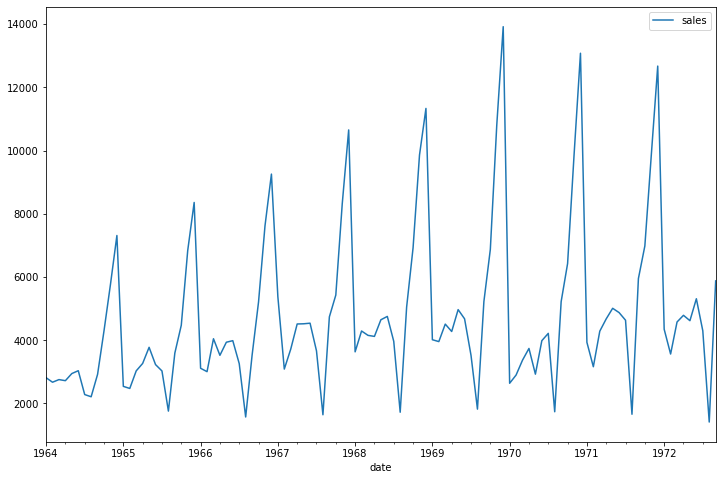

In [45]:
s_data.plot()

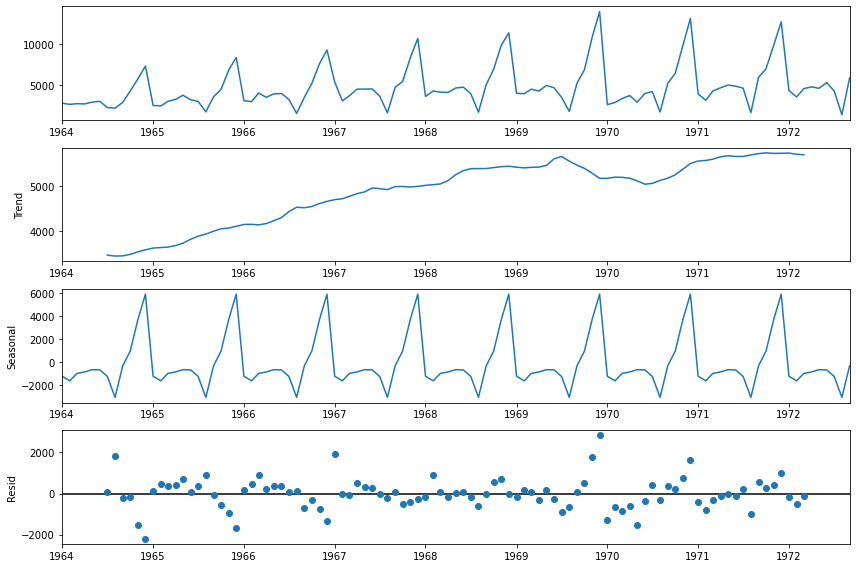

In [46]:
from statsmodels.tsa.seasonal import seasonal_decompose

seasonal_decompose(s_data, model = "additive").plot()
plt.show()

In [47]:
train_len = int(s_data.shape[0] * 0.8)

train_set = s_data[:train_len]
test_set = s_data.drop(train_set.index, axis = 0)

In [48]:
# 정상성 확인
from statsmodels.tsa.stattools import adfuller

adf = adfuller(train_set)

print("F-통계량 {}".format(adf[0]))
print("P-value {}".format(adf[1]))

F-통계량 -2.295554260552979
P-value 0.1734058202954757


In [50]:
# 정상성을 만족하지 않아 차분시행

diff_data = train_set.diff(1).dropna()
diff_data

,sales
date,
1964-02-01,-143.0
1964-03-01,83.0
1964-04-01,-34.0
1964-05-01,225.0
1964-06-01,90.0
...,...
1970-08-01,-2479.0
1970-09-01,3483.0
1970-10-01,1203.0


In [55]:
# 차분한 데이터로 다시 정상성을 만족하는지 확인

diff_adf = adfuller(diff_data)

print("F-통계량 {}".format(diff_adf[0]))
print("P-value {}".format(diff_adf[1]))

F-통계량 -21.725876749107655
P-value 0.0


C:\Users\gg787\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


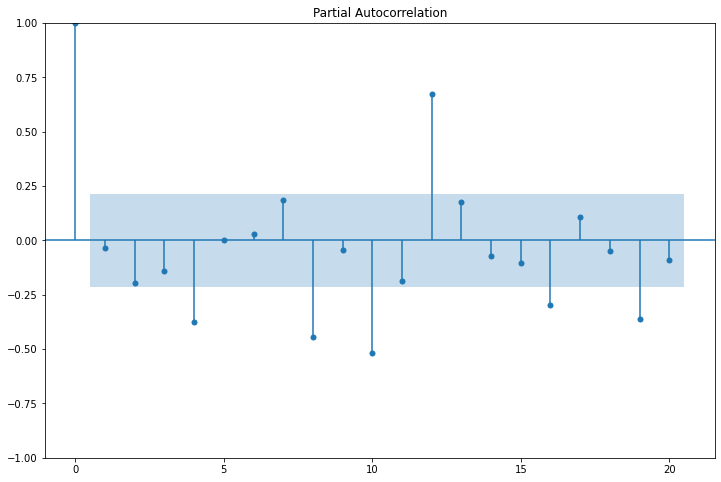

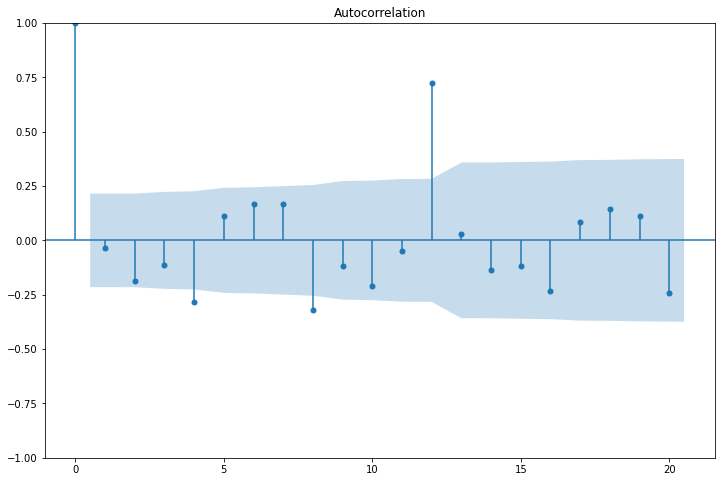

In [57]:
# p.q 를 찾기 위해 시각화

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_pacf(diff_data) # p == 0
plot_acf(diff_data) # q == 0
plt.show()

In [66]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train_set["sales"].values, order = (0,1,0),seasonal_order = (1,1,1,12),enforce_stationarity = False, enforce_invertibility = False, trend = "ct")
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                   84
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -482.148
Date:                              Thu, 19 May 2022   AIC                            974.297
Time:                                      20:29:18   BIC                            984.599
Sample:                                           0   HQIC                           978.310
                                               - 84                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     62.5982    577.780      0.108      0.914   -1069.830    1195.027
drift         -1.1071     10.059     -0.110      0.912     -20.822      18.608
ar.S.L12      -0.5149      0.231     -2.232      0.026      -0.967      -0.063
ma.S.L12       0.0974      0.197      0.495      0.621      -0.289       0.483
sigma2      9.885e+05   1.77e+05      5.582      0.000    6.41e+05    1.34e+06
===================================================================================
Ljung-Box (L1) (Q):                   6.49   Jarque-Bera (JB):                47.31
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):               2.06   Skew:                            -1.37
Prob(H) (two-sided):                  0.13   Kurtosis:                         6.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

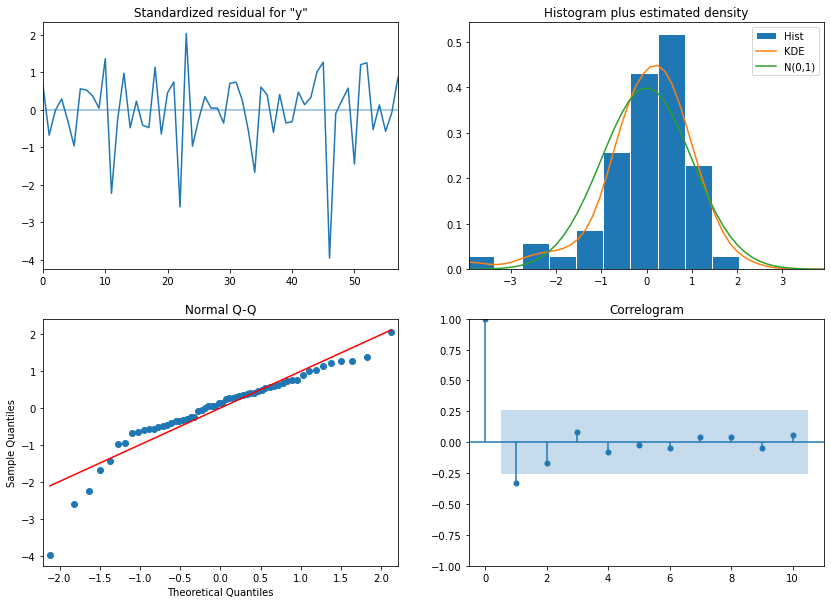

In [118]:
result.plot_diagnostics(figsize = (14,10))
plt.show()

In [68]:
forecast_data = result.get_forecast(steps = len(test_set))

In [71]:
forecast_data.summary_frame()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,3425.068791,994.247798,1476.378915,5373.758668
1,3480.386119,1406.078721,724.522467,6236.249771
2,3985.801940,1722.087702,610.572066,7361.031814
3,4067.503902,1988.495597,170.124149,7964.883654
4,3854.499982,2223.205663,-502.903049,8211.903013
5,4299.581809,2435.399784,-473.714055,9072.877672
6,3902.301458,2630.532416,-1253.447337,9058.050253
7,1734.555166,2812.157441,-3777.172138,7246.282469
8,5149.099855,2982.743395,-696.969774,10995.169484
9,6486.618630,3144.087601,324.320167,12648.917092


<AxesSubplot:xlabel='date'>

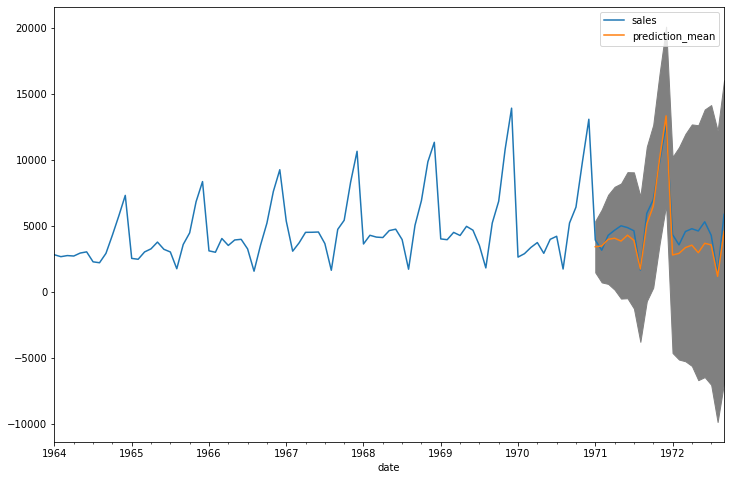

In [87]:
# plt.plot(train_set)
ax = s_data.plot()
ci_df = pd.DataFrame(forecast_data.conf_int(), index = test_set.index)
ax.fill_between(ci_df.index, ci_df.iloc[:,0],ci_df.iloc[:,1], color = "gray")

prediction_df = pd.DataFrame(forecast_data.predicted_mean, columns = ["prediction_mean"], index = test_set.index)
prediction_df.plot(ax = ax)

In [74]:
from sklearn.metrics import r2_score

r2_score(test_set, forecast_data.predicted_mean)

0.8516313745270355

<AxesSubplot:xlabel='date'>

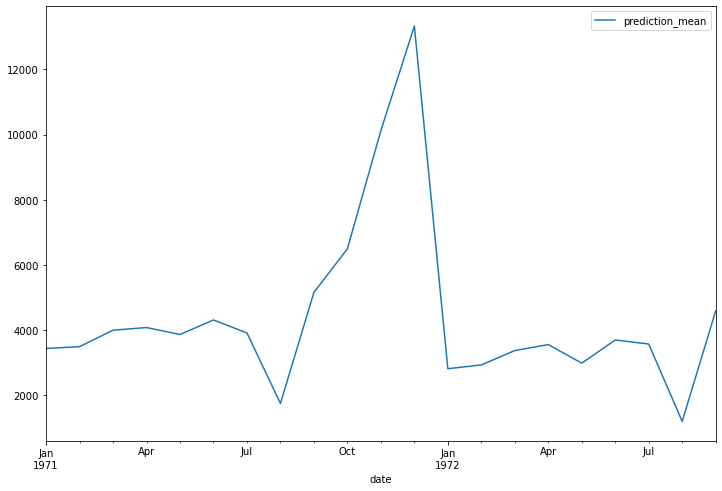

In [89]:
prediction_df.plot()

In [106]:
from pmdarima import auto_arima

auto_model = auto_arima(train_set["sales"], start_P = 1, start_D = 1, start_Q = 1,
                       max_P = 5, max_D = 5, max_Q = 5, trace = True, stepwise = True,m = 12)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=1160.006, Time=0.82 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1183.693, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1173.736, Time=0.08 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1157.042, Time=0.21 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1155.109, Time=0.04 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1157.009, Time=0.20 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=1158.348, Time=0.45 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=1155.379, Time=0.07 sec
 ARIMA(0,1,2)(0,1,0)[12]             : AIC=1155.138, Time=0.07 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1173.612, Time=0.02 sec
 ARIMA(1,1,2)(0,1,0)[12]             : AIC=1155.790, Time=0.11 sec
 ARIMA(0,1,1)(0,1,0)[12] intercept   : AIC=inf, Time=0.06 sec

Best model:  ARIMA(0,1,1)(0,1,0)[12]          
Total fit time: 2.169 seconds


In [107]:
auto_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   84
Model:             SARIMAX(0, 1, 1)x(0, 1, [], 12)   Log Likelihood                -575.554
Date:                             Thu, 19 May 2022   AIC                           1155.109
Time:                                     20:55:50   BIC                           1159.634
Sample:                                          0   HQIC                          1156.908
                                              - 84                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8756      0.060    -14.663      0.000      -0.993      -0.759
sigma2       5.86e+05   7.15e+04      8.195      0.000    4.46e+05    7.26e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.16   Jarque-Bera (JB):                 6.95
Prob(Q):                              0.69   Prob(JB):                         0.03
Heteroskedasticity (H):               2.13   Skew:                             0.01
Prob(H) (two-sided):                  0.07   Kurtosis:                         4.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [108]:
auto_prediction = auto_model.predict(n_periods= len(test_set))

In [109]:
auto_prediction

array([ 2260.64070933,  2520.64070933,  2991.64070933,  3361.64070933,
        2548.64070933,  3607.64070933,  3838.64070933,  1359.64070933,
        4842.64070933,  6045.64070933,  9463.64070933, 12697.64070933,
        1882.28141866,  2142.28141866,  2613.28141866,  2983.28141866,
        2170.28141866,  3229.28141866,  3460.28141866,   981.28141866,
        4464.28141866])

In [114]:
r2_score(test_set, auto_prediction)

auto_prediction_df = pd.DataFrame(auto_prediction, index = test_set.index)

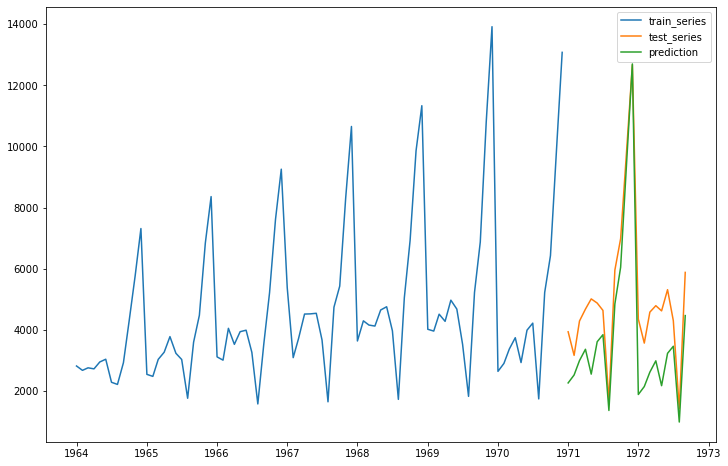

In [117]:
plt.plot(train_set, label = "train_series")
plt.plot(test_set, label = "test_series")
plt.plot(auto_prediction_df, label = "prediction")
plt.legend()